<img>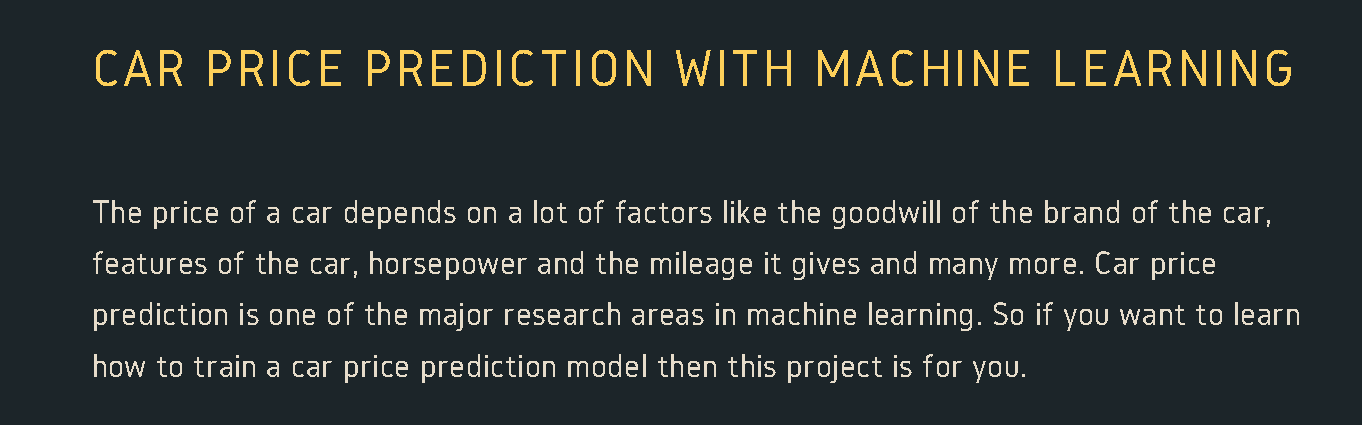

# Data Loading and Preprocessing:

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [179]:
cp = pd.read_csv("C:\PGA32\MeriSkill\Oasis Infobyte\car data.csv")

In [180]:
cp

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [181]:
cp.shape

(301, 9)

In [182]:
cp.size

2709

In [183]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [184]:
cp.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [185]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [186]:
cp.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


### No Missing Value

In [187]:
cp.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [188]:
set(cp.duplicated())

{False, True}

In [189]:
cp.duplicated().sum()

2

In [190]:
# Check for duplicates across all columns
duplicated = cp.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
cp[duplicated]

Number of duplicated instances: 2


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


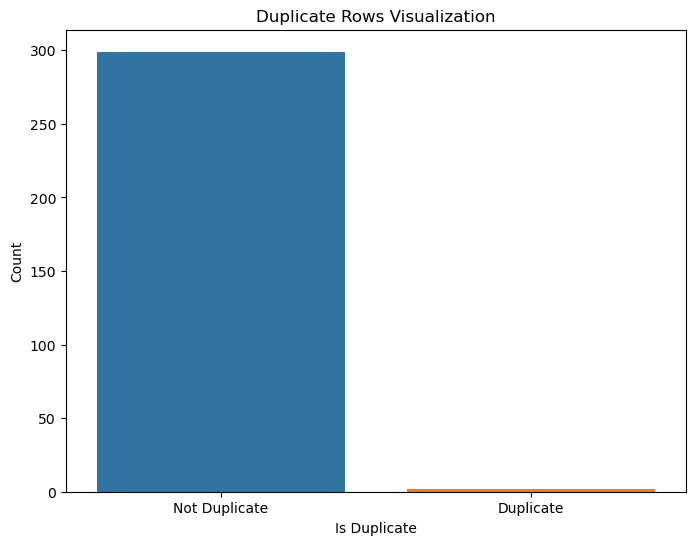

In [191]:
cp['Is_Duplicate'] = cp.duplicated()


# Create a count plot to visualize duplicates
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Duplicate', data=cp)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.title('Duplicate Rows Visualization')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate']) 
plt.show()

# Drop the "Is_Duplicate" column if not needed
cp.drop(columns=['Is_Duplicate'], inplace=True)

### Duplicate Dropping

In [192]:
cp = cp.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
                                'Selling_type', 'Transmission', 'Owner'])

In [193]:
# Check for duplicates across all columns
duplicated = cp.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
cp[duplicated]

Number of duplicated instances: 0


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


## Numerical Columns

In [194]:
cp.dtypes[cp.dtypes!="object"]

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Owner              int64
dtype: object

In [195]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = cp[numerical_columns]

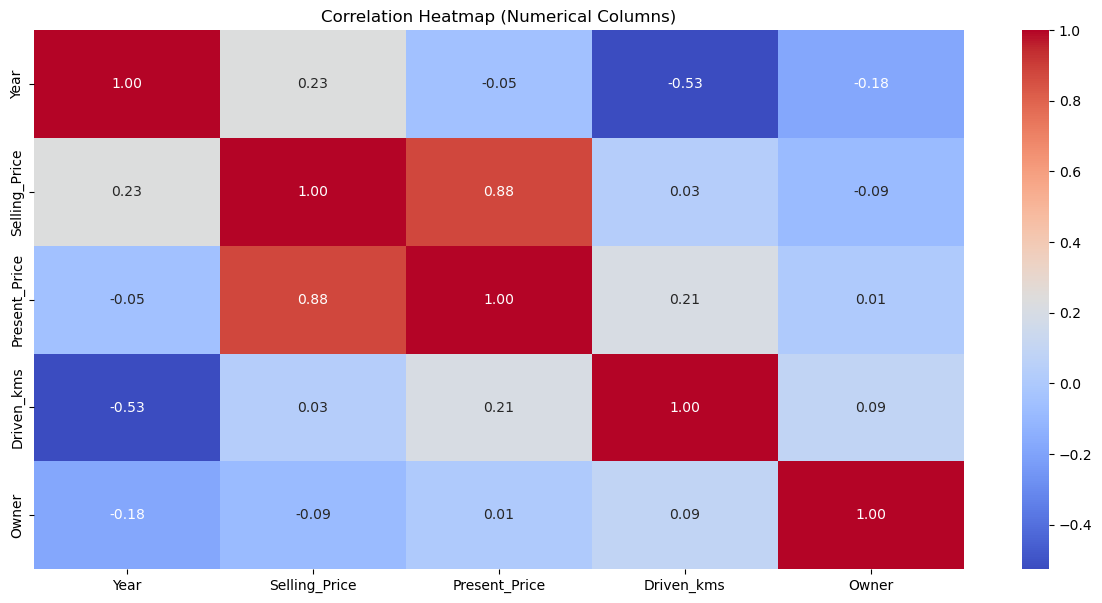

In [196]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [197]:
correlation_matrix.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.199905,-0.178871,-0.910902,-0.464685
Selling_Price,0.199905,1.000000,0.921894,-0.203017,-0.576554
Present_Price,-0.178871,0.921894,1.000000,0.128255,-0.388411
Driven_kms,-0.910902,-0.203017,0.128255,1.000000,0.135237
Owner,-0.464685,-0.576554,-0.388411,0.135237,1.000000


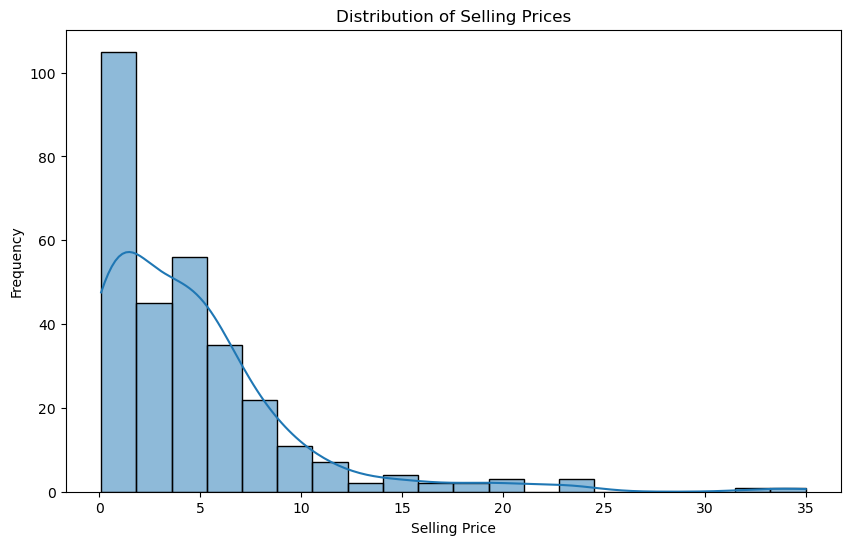

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(cp['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

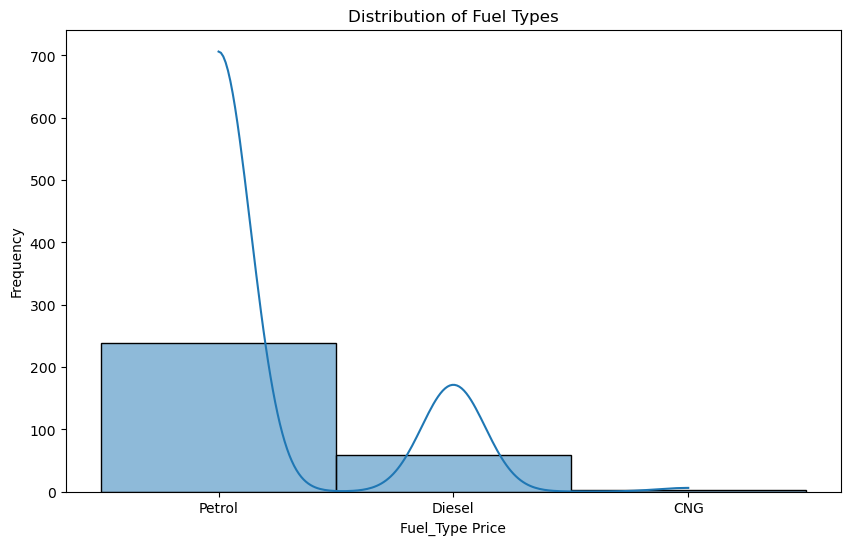

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(cp['Fuel_Type'], bins=20, kde=True)
plt.xlabel('Fuel_Type Price')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Types')
plt.show()

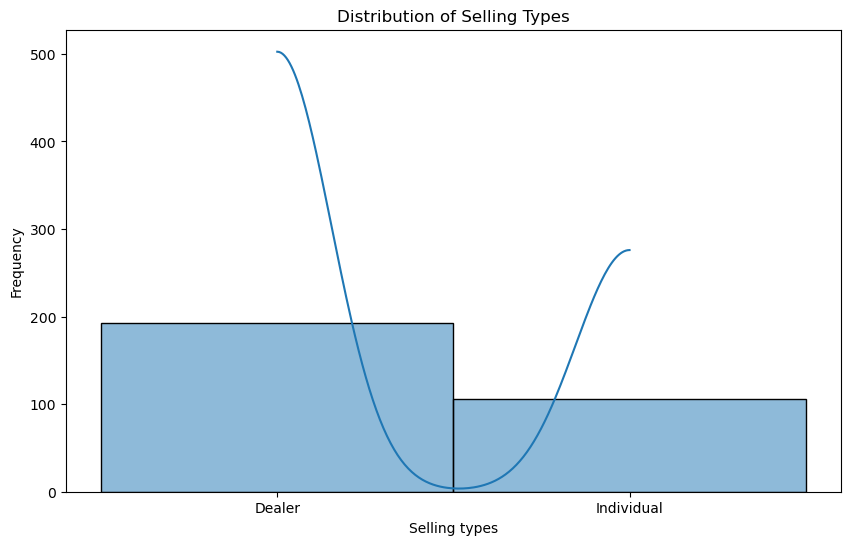

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(cp['Selling_type'], bins=20, kde=True)
plt.xlabel('Selling types')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Types')
plt.show()

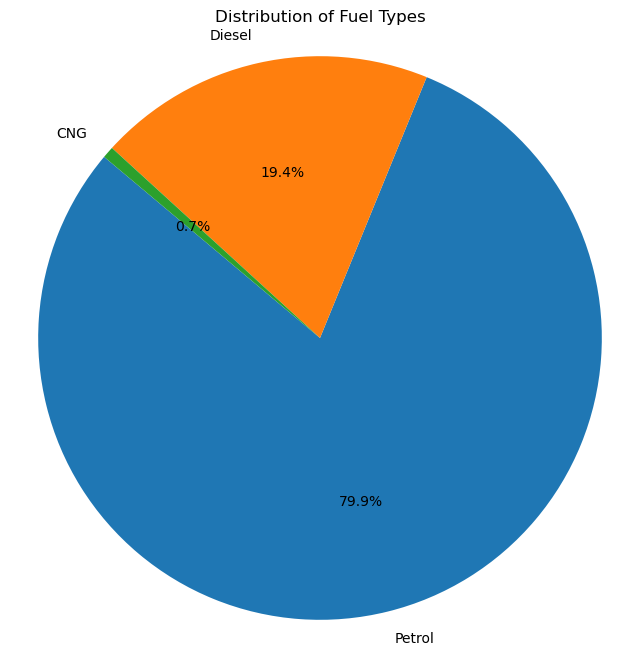

In [201]:
species_counts = cp['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Distribution of Fuel Types')
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

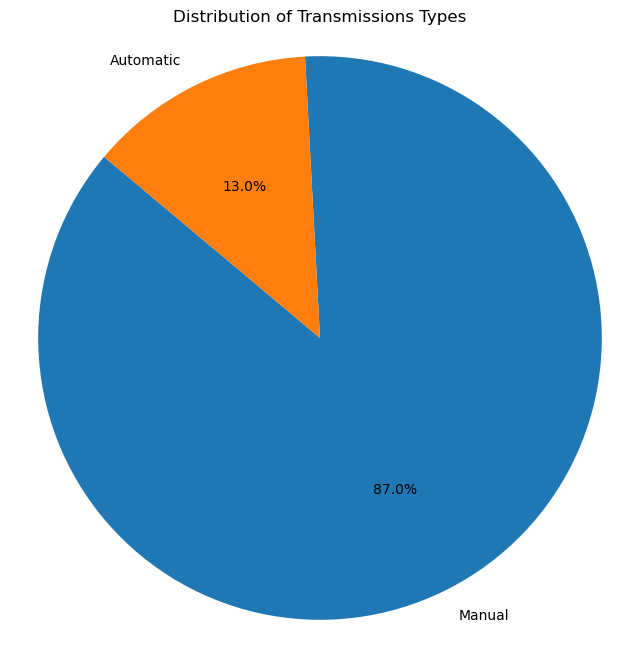

In [202]:
species_counts = cp['Transmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Distribution of Transmissions Types')
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

In [203]:
def univariate_numerical(data,var,graph_plot=True):
    missing=data[var].isnull().sum()
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p99=data[var].quantile(.99)
    iqr=p75-p25
    
    if graph_plot==True:
        sns.histplot(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()
        
    results={"missing":missing,"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p10":p10,"p25":p25,"p50":p50,"p75":p75,"p99":p99,}
    return results

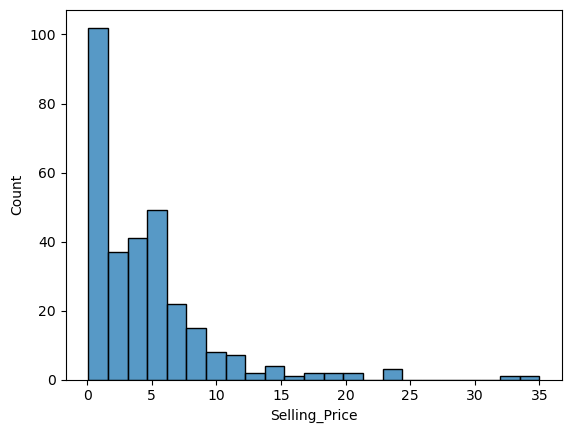

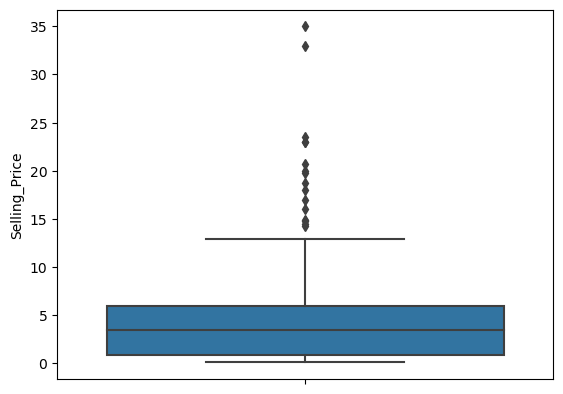

{'missing': 0,
 'min': 0.1,
 'max': 35.0,
 'var': 24.842645166214016,
 'std': 4.984239677845962,
 'p10': 0.4,
 'p25': 0.8500000000000001,
 'p50': 3.51,
 'p75': 6.0,
 'p99': 23.00999999999999}

In [204]:
univariate_numerical(data=cp, var="Selling_Price")

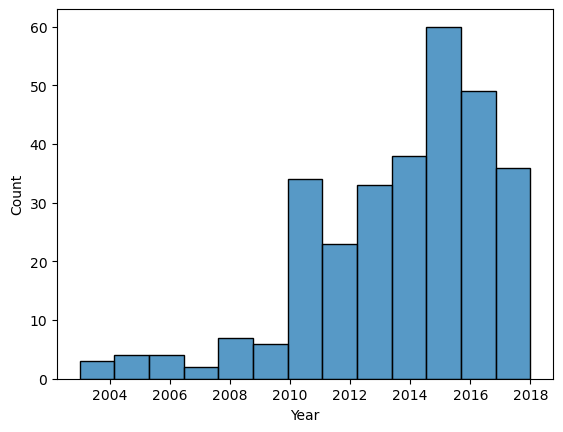

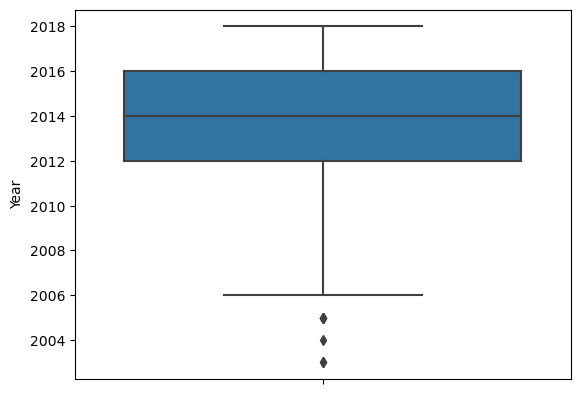

{'missing': 0,
 'min': 2003,
 'max': 2018,
 'var': 8.391843056272588,
 'std': 2.8968678009658273,
 'p10': 2010.0,
 'p25': 2012.0,
 'p50': 2014.0,
 'p75': 2016.0,
 'p99': 2017.0}

In [205]:
univariate_numerical(data=cp, var="Year")

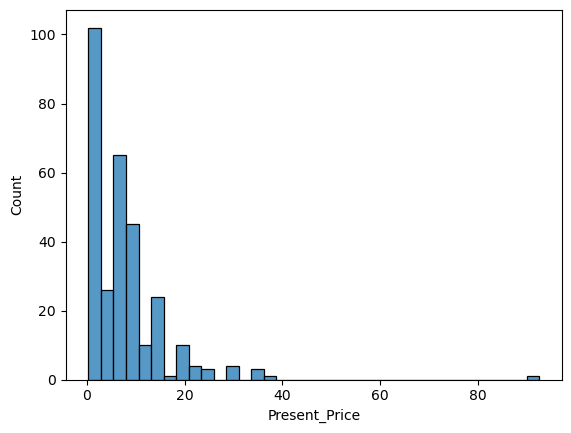

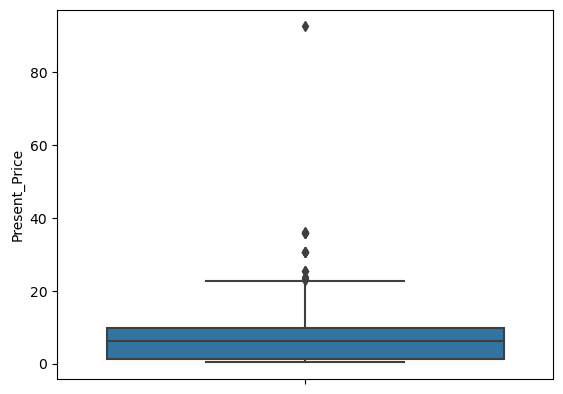

{'missing': 0,
 'min': 0.32,
 'max': 92.6,
 'var': 73.38203894830627,
 'std': 8.566331708981755,
 'p10': 0.7060000000000001,
 'p25': 1.2,
 'p50': 6.1,
 'p75': 9.84,
 'p99': 35.96}

In [206]:
univariate_numerical(data=cp, var="Present_Price")

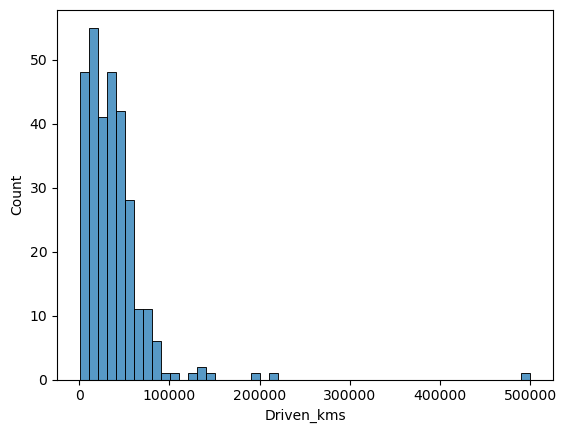

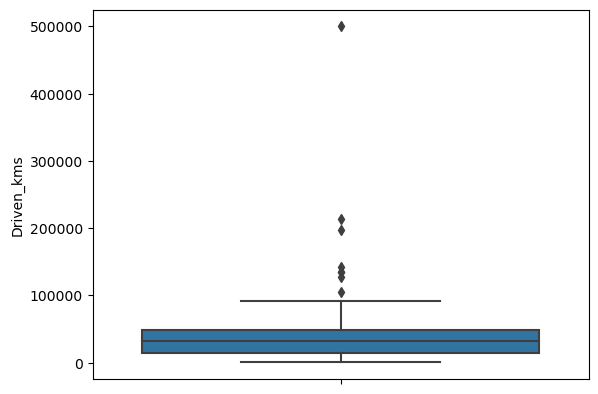

{'missing': 0,
 'min': 500,
 'max': 500000,
 'var': 1522183517.6298168,
 'std': 39015.17035243876,
 'p10': 5940.0,
 'p25': 15000.0,
 'p50': 32000.0,
 'p75': 48883.5,
 'p99': 143103.519999999}

In [207]:
univariate_numerical(data=cp, var="Driven_kms")

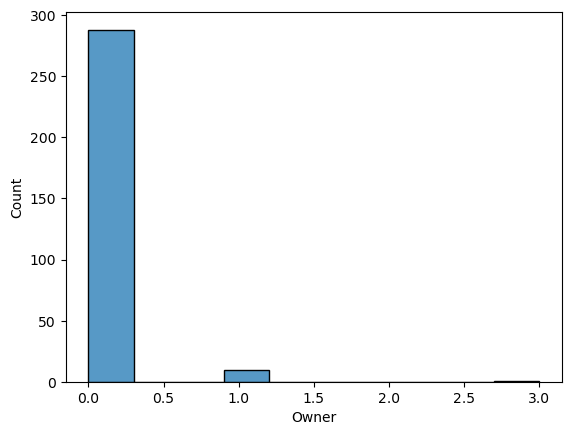

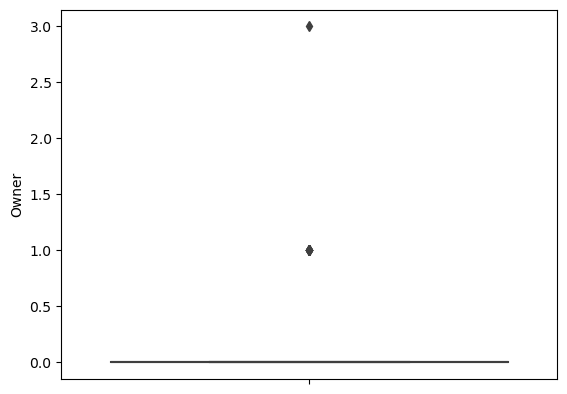

{'missing': 0,
 'min': 0,
 'max': 3,
 'var': 0.061861686606361384,
 'std': 0.24872009690887745,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 0.0,
 'p99': 1.0}

In [208]:
univariate_numerical(data=cp, var="Owner")

### Driven KMS Vs. Selling Price and Present Price3

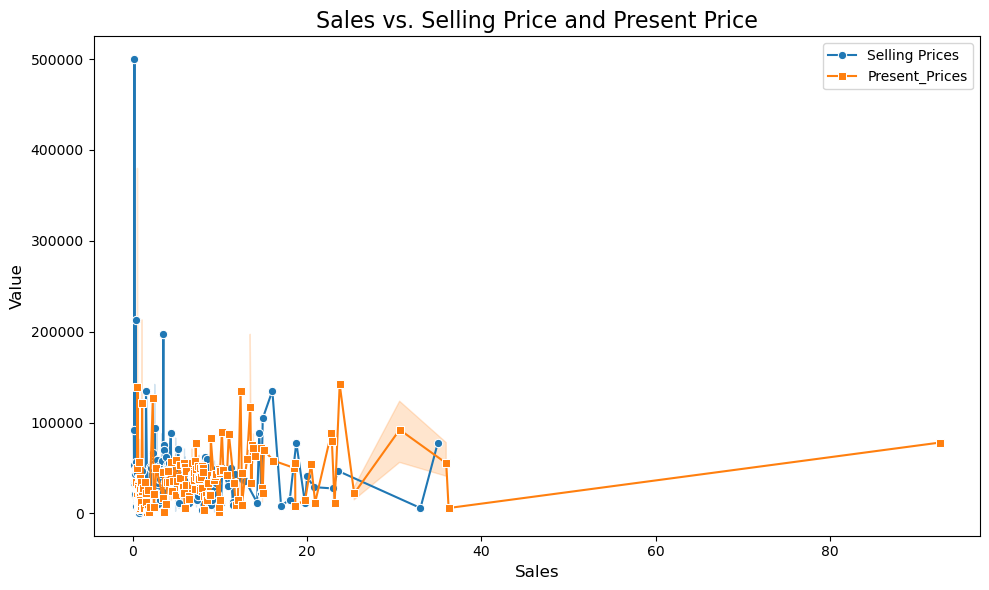

In [209]:
plt.figure(figsize=(10, 6))

# Create line plots for 'alcohol' and 'residual sugar' against 'density'
sns.lineplot(x="Selling_Price", y="Driven_kms", data=cp, label='Selling Prices', marker='o')
sns.lineplot(x="Present_Price", y="Driven_kms", data=cp, label='Present_Prices', marker='s')

plt.title("Sales vs. Selling Price and Present Price", fontsize=16)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

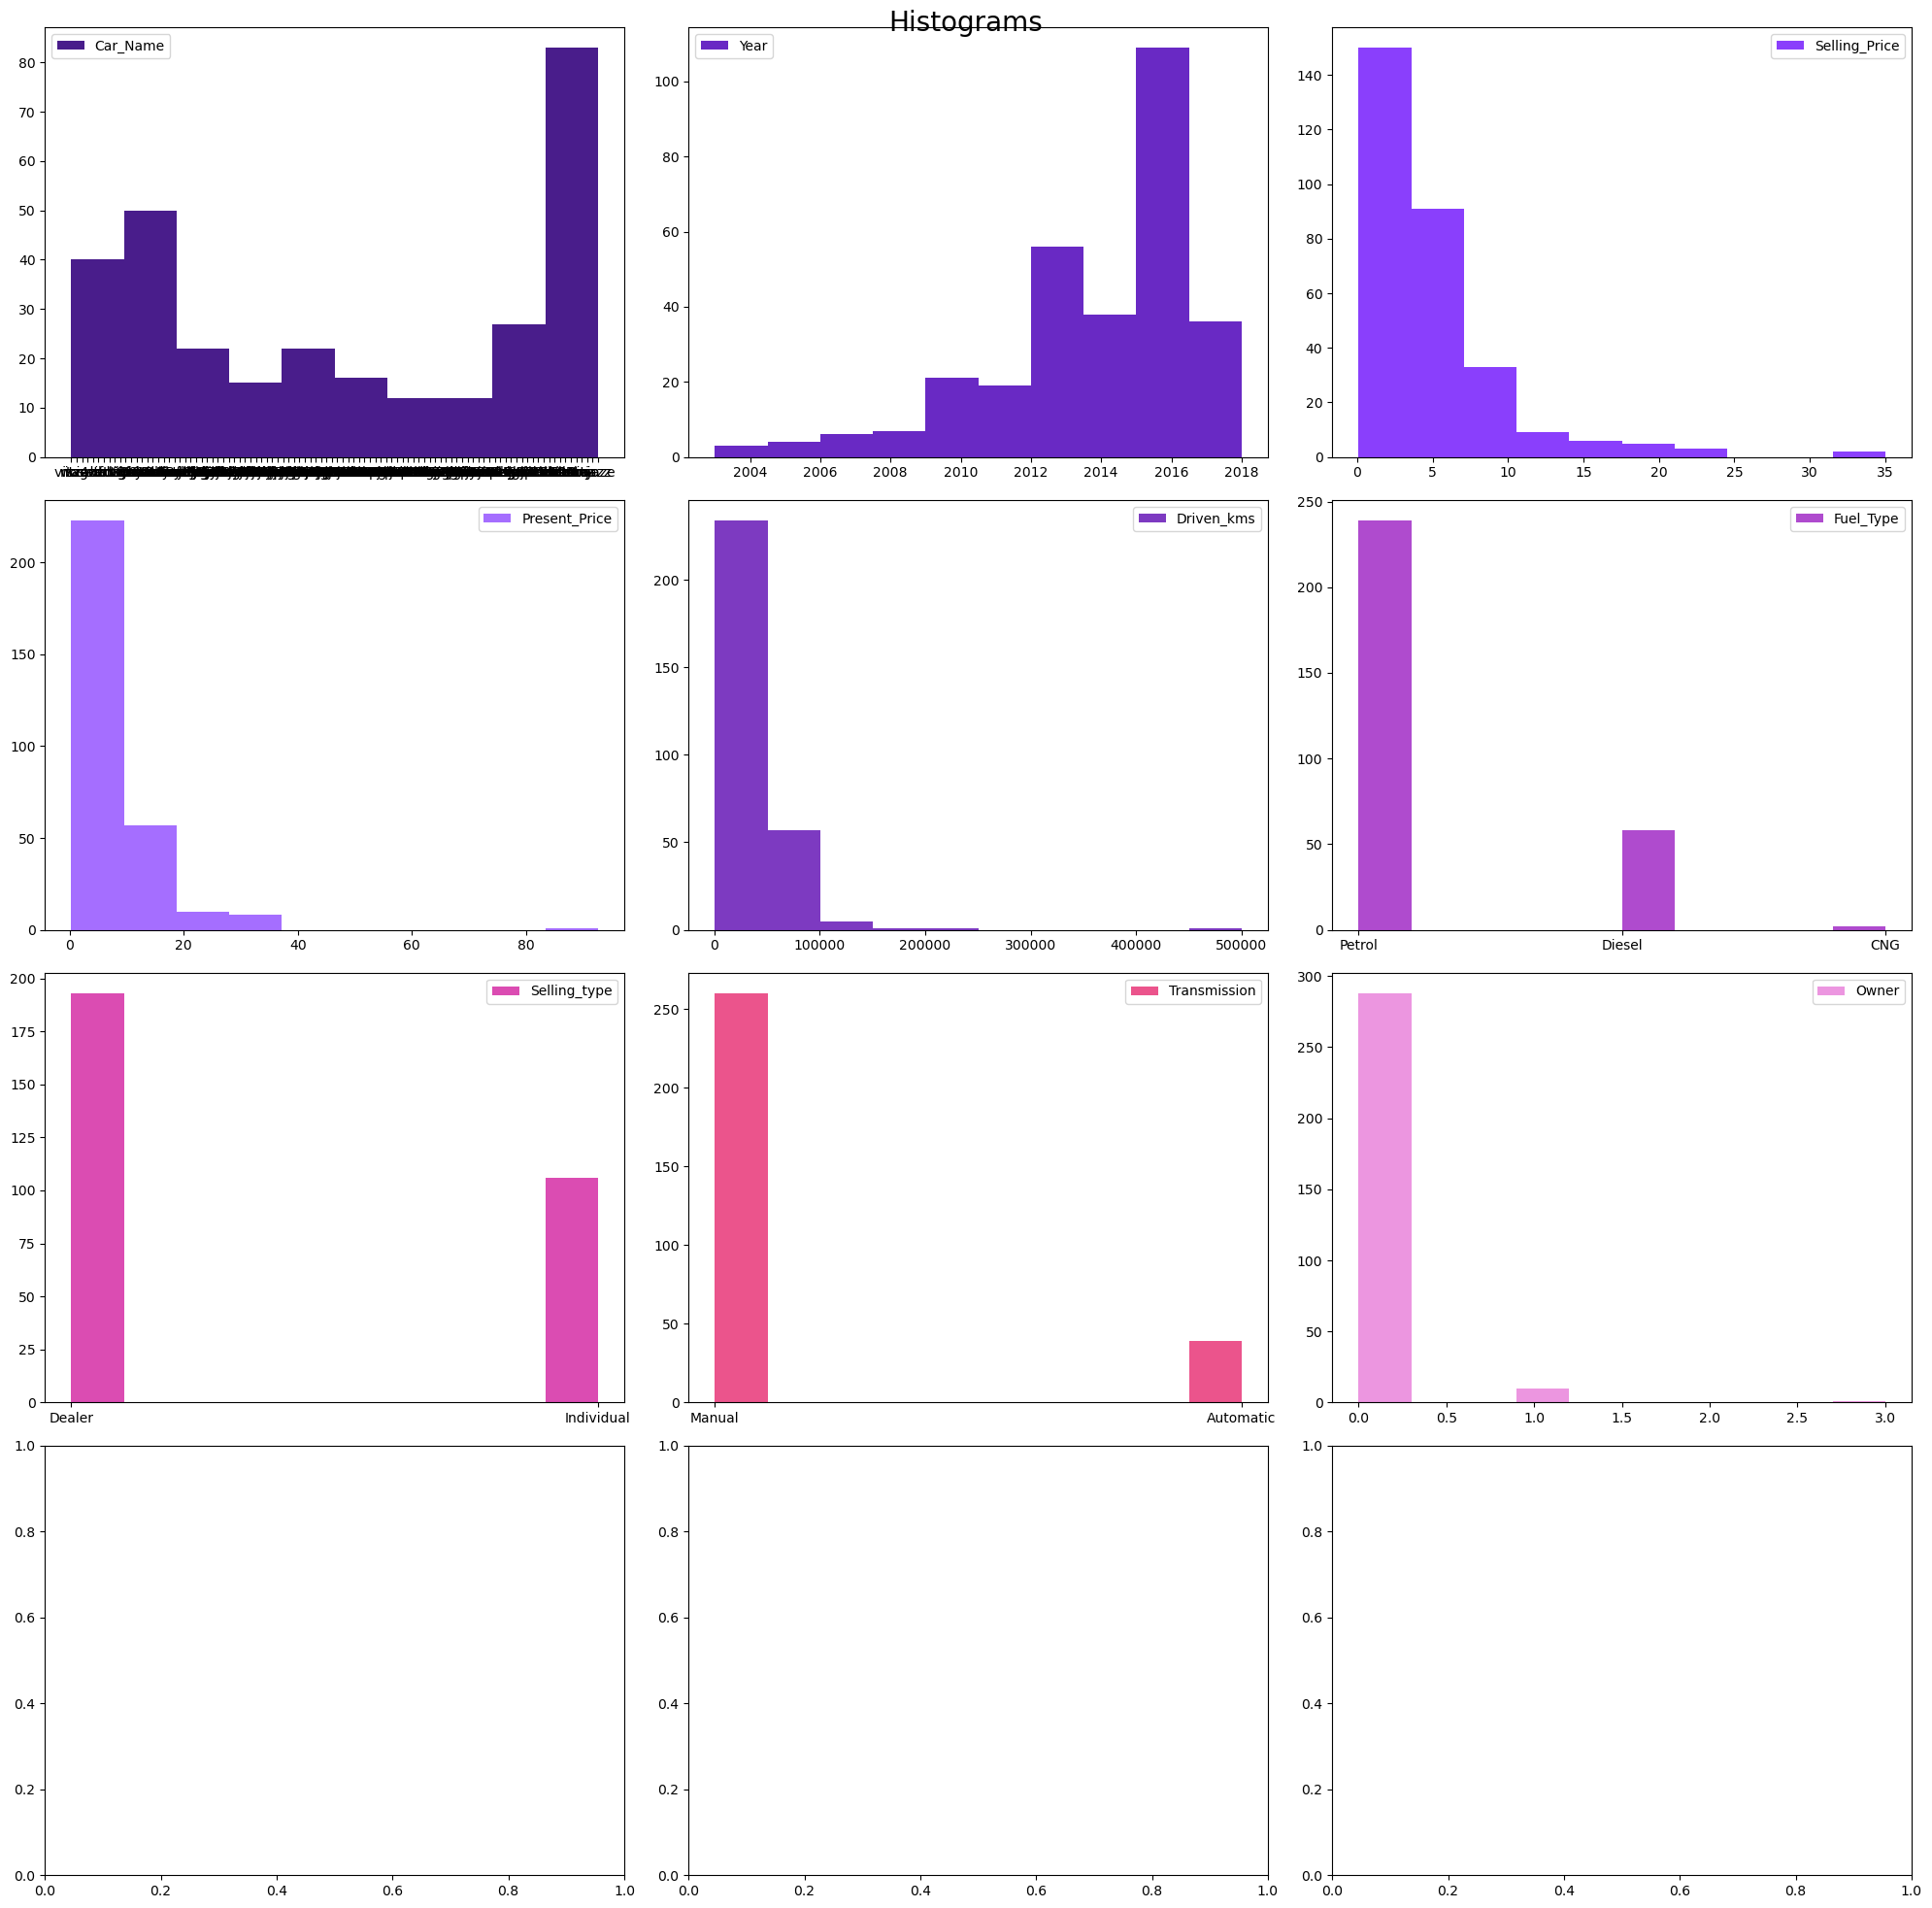

In [210]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Modify the color list to match the number of columns in your dataset
colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

# Loop through each column in your wine_df dataset
for index, column in enumerate(cp.columns):
    if index < 12:  # Limit the iteration to the number of subplots
        ax = axes.flatten()[index]
        ax.hist(cp[column], color=colors[index], label=column)
        ax.legend(loc="best")

plt.suptitle("Histograms", size=20)
plt.tight_layout()
plt.show()

### There is a statistically significant relationship between the "Selling_Price" and "Present_Price" & "Selling_Price" and "Year"  variables

In [211]:
from scipy import stats
figure=pd.crosstab(cp["Selling_Price"], cp["Present_Price"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=23320.2206292517, pvalue=0.006369652129717279, dof=22785, expected_freq=array([[0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448],
       [0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448],
       [0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448],
       ...,
       [0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448],
       [0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448],
       [0.00334448, 0.00334448, 0.00334448, ..., 0.01003344, 0.00334448,
        0.00334448]]))

In [212]:
from scipy import stats
figure=pd.crosstab(cp["Selling_Price"], cp["Year"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=2443.8008122656674, pvalue=0.04243557416005079, dof=2325, expected_freq=array([[0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448],
       [0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448],
       [0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448],
       ...,
       [0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448],
       [0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448],
       [0.00668896, 0.00334448, 0.01337793, ..., 0.1638796 , 0.11705686,
        0.00334448]]))

### I am visualizing the correlation of the dataset with the seaborn library.

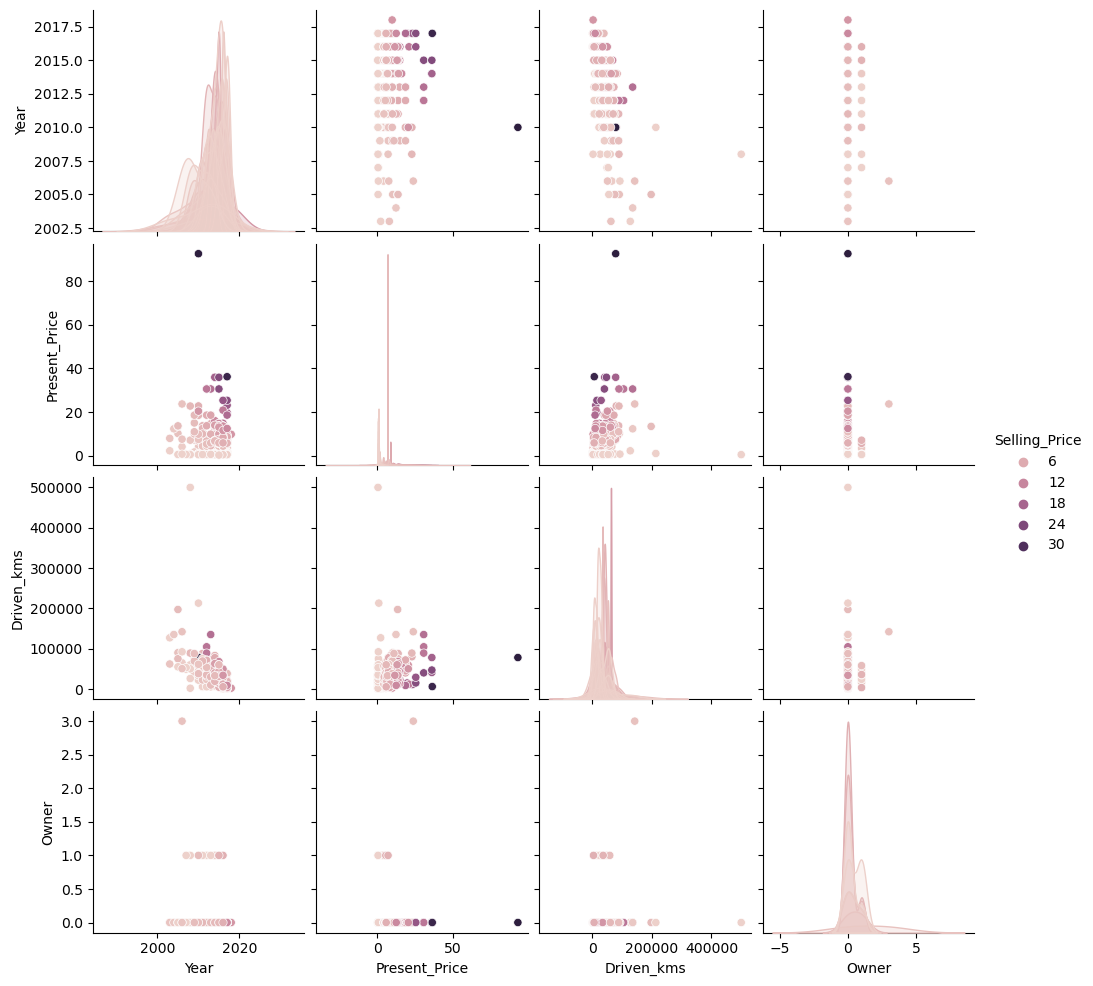

In [213]:
sns.pairplot(cp, hue = "Selling_Price")
plt.show()

## Correlation Matrix

In [214]:
d=cp.corr()
def mylight(x):
    color="red" if abs(x)>=.6 else ""
    return "background-color: {}".format(color)

In [215]:
d.style.applymap(mylight)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


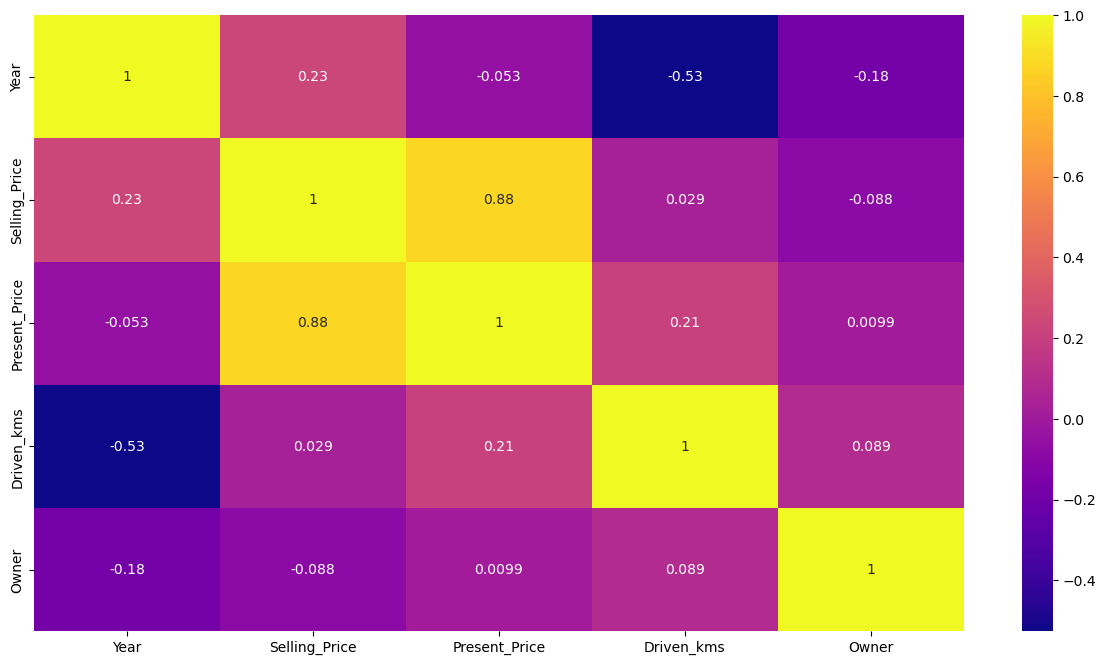

In [216]:
corrmat=cp.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat,cmap = 'plasma', annot=True)
plt.show()


### There is a strong positive correlation (0.88) between "Selling_Price" and "Present_Price."
### There is a strong negative correlation (-0.53) between "Driven_kms" and "Year."

# Data Encoding:

In [217]:
# checking the distribution of categorical data
print(cp['Fuel_Type'].value_counts())
print(cp['Selling_type'].value_counts())
print(cp['Transmission'].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


#### Label Encoding

In [218]:
# encoding "Fuel_Type" Column
cp.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
cp.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
cp.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
cp

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Modeling: Feature Scaling
Pre-processing Steps for Machine Learning

In [219]:
X = cp.drop(['Car_Name','Selling_Price'],axis=1)
y = cp['Selling_Price']

In [220]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [221]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

#### Splitting the data

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### Feature Scaling

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Regression Models

## Linear Regression

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [226]:
# Create and fit the linear regression model
lin_reg = LinearRegression()

In [227]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [228]:
# Make predictions
y_pred = lin_reg.predict(X_test)

In [229]:
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse_linear)

Linear Regression Mean Squared Error: 2.405203022617024


In [230]:
from sklearn.metrics import mean_squared_error, r2_score

In [231]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Score:", r2) 

R-squared (R^2) Score: 0.8915921588461179


In [232]:
# Optionally, you can print the model coefficients and intercept
print("Coefficients:", lin_reg.coef_)


print("Intercept:", lin_reg.intercept_)

Coefficients: [ 1.15565057  3.85889097 -0.23759324  0.53812924 -0.58201869  0.51898959
 -0.20249736]
Intercept: 4.456820083682


In [233]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {lin_reg.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {lin_reg.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 89.16
The Train_accuracy: 87.12


In [234]:
print(f"Linear Regression Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression R-squared (R2): {r2:.2f}")

Linear Regression Mean Squared Error (MSE): 2.41
Linear Regression R-squared (R2): 0.89


### Evaluation and Visualization: 

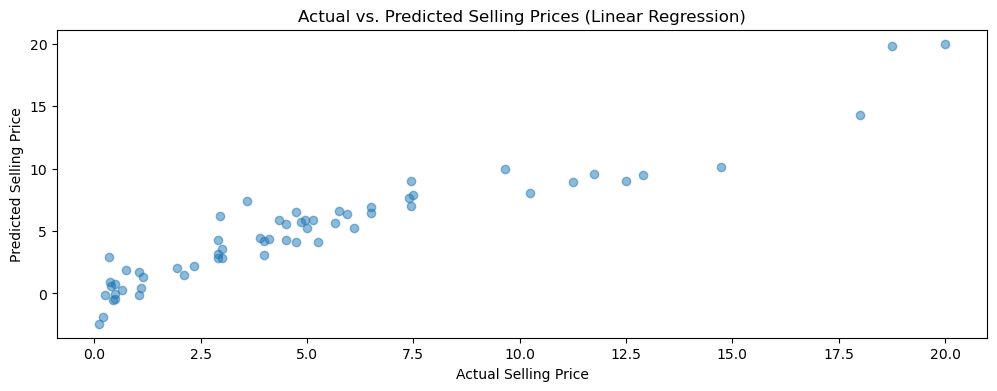

In [235]:
plt.figure(figsize=(12,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

# Decision Tree Regression

In [236]:
from sklearn.tree import DecisionTreeRegressor

In [237]:
Deci_Tree = DecisionTreeRegressor(random_state=17)

In [238]:
# Train the model on the training set
Deci_Tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=17)

In [239]:
# Make predictions on the test set
y_preds = Deci_Tree.predict(X_test)

In [240]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {Deci_Tree.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Deci_Tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 92.27
The Train_accuracy: 100.00


In [241]:
# Evaluate the model
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

In [242]:
print(f'Decision Tree Mean Squared Error: {mse:.2f}')
print(f'Decision Tree R-squared Score: {r2:.2f}')

Decision Tree Mean Squared Error: 1.72
Decision Tree R-squared Score: 0.92


### Evaluation and Visualization:

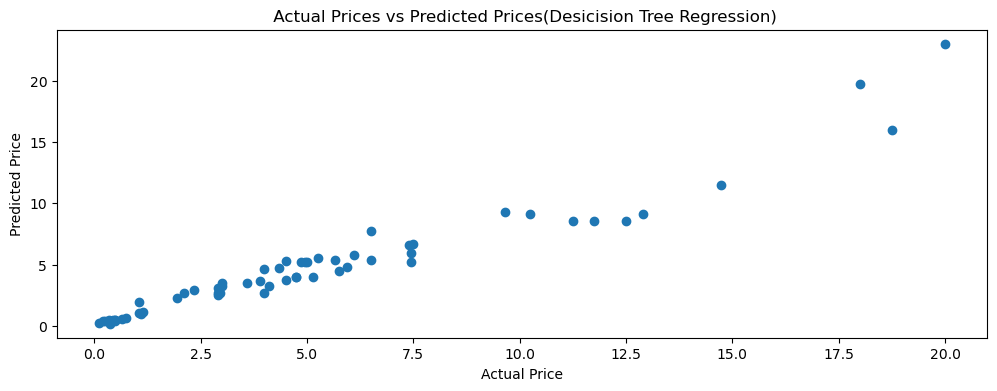

In [243]:
plt.figure(figsize=(12,4))


plt.scatter(y_test, y_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices(Desicision Tree Regression)")
plt.show()

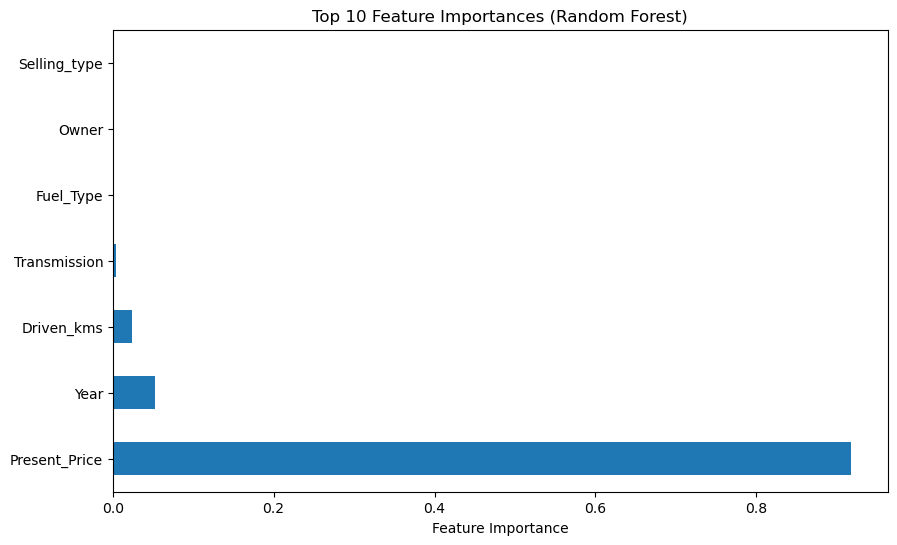

In [244]:
feature_importances = pd.Series(Deci_Tree.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# Support Vector Machine Regression Model

In [245]:
from sklearn.svm import SVR

In [246]:
# Initialize the Support Vector Regression model
Support_V = SVR(kernel='linear', C=5)

In [247]:
# Train the model on the scaled training set
Support_V.fit(X_train, y_train)

SVR(C=5, kernel='linear')

In [248]:
# Make predictions on the scaled test set
y_pred_s = Support_V.predict(X_test)

In [250]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {Support_V.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Support_V.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.81
The Train_accuracy: 84.10


In [251]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_s)
r2 = r2_score(y_test, y_pred_s)

In [252]:
print(f'Support Vector Machine Mean Squared Error: {mse:.2f}')
print(f'Support Vector Machine R-squared Score: {r2:.2f}')

Support Vector Machine Mean Squared Error: 2.70
Support Vector Machine R-squared Score: 0.88


### Evaluation and Visualization:

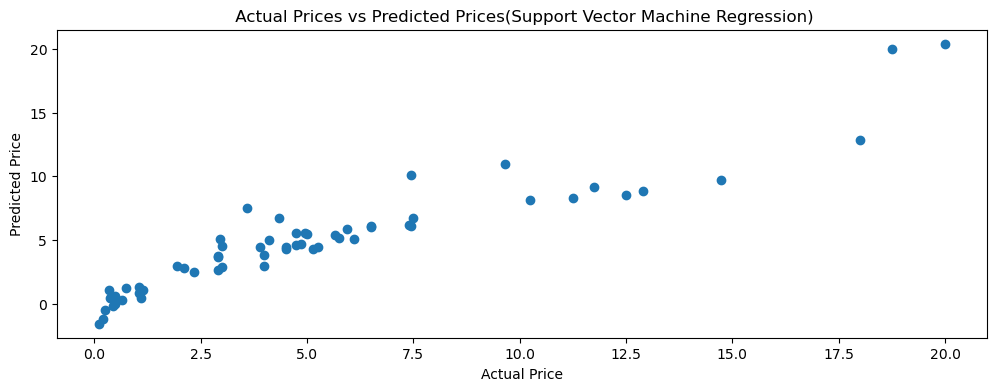

In [253]:
plt.figure(figsize=(12,4))


plt.scatter(y_test, y_pred_s)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices(Support Vector Machine Regression)")
plt.show()

# Random Forest Regression Model

In [254]:
from sklearn.ensemble import RandomForestRegressor

In [255]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [256]:
# Initialize the Random Forest Regressor model
Random_Forest_model = RandomForestRegressor(n_estimators=100, random_state=17)

In [257]:
# Train the model on the training set
Random_Forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [258]:
# Make predictions on the test set
y_pred_ss = Random_Forest_model.predict(X_test)

In [259]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {Random_Forest_model.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Random_Forest_model.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.34
The Train_accuracy: 98.29


In [260]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ss)
r2 = r2_score(y_test, y_pred_ss)

In [261]:
print(f'Random Forest Mean Squared Error: {mse:.2f}')
print(f'Random Forest R-squared Score: {r2:.2f}')

Random Forest Mean Squared Error: 0.60
Random Forest R-squared Score: 0.96


### Evaluation and Visualization:

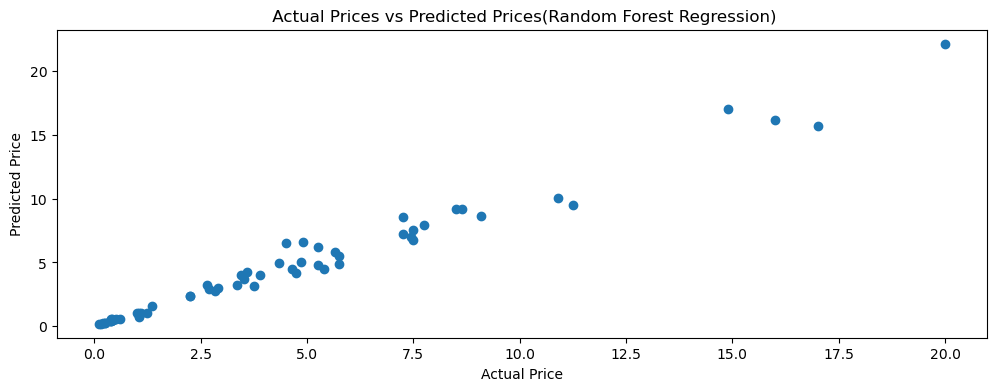

In [171]:
plt.figure(figsize=(12,4))


plt.scatter(y_test, y_pred_ss)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices(Random Forest Regression)")
plt.show()

### The model with the highest R-squared score is the Random Forest with a score of 0.96. The Random Forest regression model is considered to have the best goodness of fit to the data.